In [2]:
from ml_helpers import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [4]:
images_all, labels_all = load_dataset()

Reading dataset/dataset.yaml... done!
Loading images.................... done!
Loaded 6888 images in 339.764032125473 seconds!


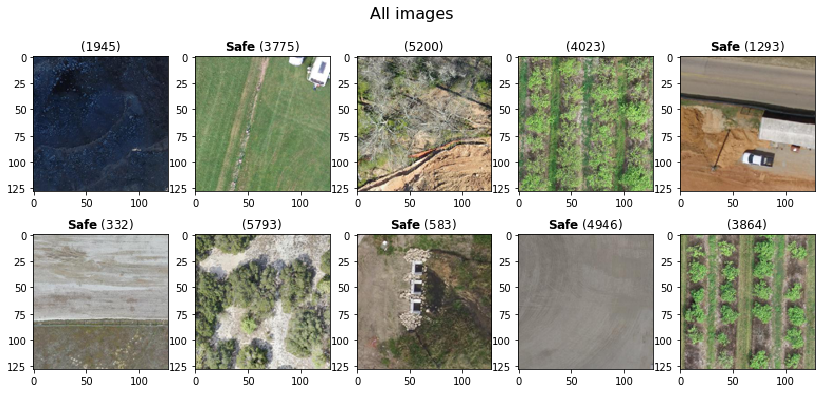

In [5]:
def visualize_labels(title, images, labels, seed=11):
    
    assert len(images.shape) == 4
    assert len(labels.shape) == 1
    assert labels.shape[0] == images.shape[0]
    assert images.shape[-1] == 3

    generator = np.random.RandomState(seed)
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    for ax in axes.flatten():
        index = generator.randint(len(images))
        ax.imshow(images[index])
        if labels[index] == 1:
            ax.set_title(f"$\\bf{{Safe}}$ ({index})")
        else:
            ax.set_title(f"({index})")
    fig.suptitle(title, fontsize=16)

visualize_labels("All images", images_all, labels_all)

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

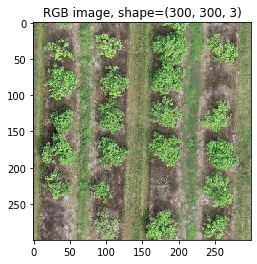

In [8]:
from cv_helpers import load_image, visualize_rgb

rgb_image = load_image(r"C:\Users\Irum\Documents\dataset\images-jpeg\03864.jpeg")
visualize_rgb("RGB image", rgb_image)

In [9]:
from cv_helpers import visualize_single_channel,load_image, visualize_rgb

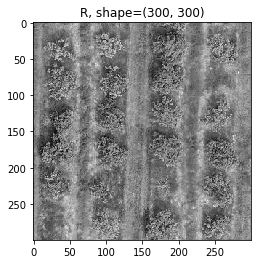

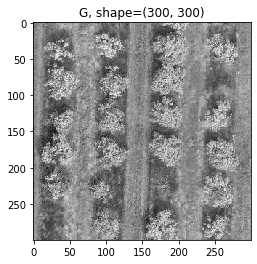

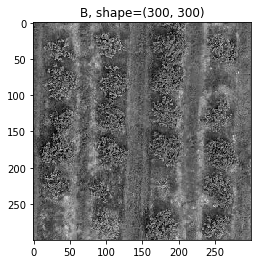

In [10]:
g_channel = None
b_channel = None

r_channel = rgb_image[:, :, 0]
g_channel = rgb_image[:, :, 1]
b_channel = rgb_image[:, :, 2]


assert rgb_image.shape == (300, 300, 3)
assert r_channel.shape == (300, 300)
assert g_channel.shape == (300, 300)
assert b_channel.shape == (300, 300)

visualize_single_channel("R", r_channel)
visualize_single_channel("G", g_channel)
visualize_single_channel("B", b_channel)

In [11]:
from cv_helpers import rgb2hsl, hsl2rgb

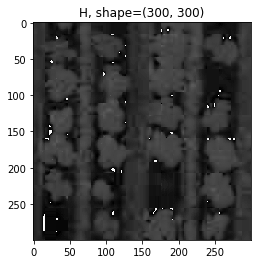

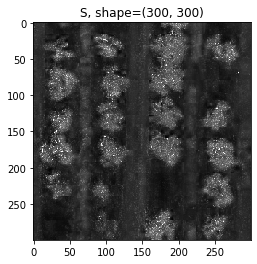

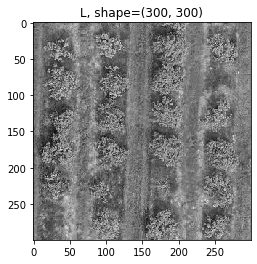

In [12]:
hsl_image = rgb2hsl(rgb_image)
assert hsl_image.shape == (300, 300, 3)

h_channel = None
s_channel = None
l_channel = None

h_channel = hsl_image[:, :, 0]
s_channel = hsl_image[:, :, 1]
l_channel = hsl_image[:, :, 2]

assert h_channel.shape == (300, 300)
assert s_channel.shape == (300, 300)
assert l_channel.shape == (300, 300)


visualize_single_channel("H", h_channel)
visualize_single_channel("S", s_channel)
visualize_single_channel("L", l_channel)


In [13]:
def histogram_single_channel(image, bins):

    hist, bin_edges = np.histogram(image, bins=bins, range=(0.0, 1.0)) 
    return hist


assert histogram_single_channel(np.zeros((10, 10)), 200)[0] == 100
assert histogram_single_channel(np.ones((10, 10)), 200)[-1] == 100

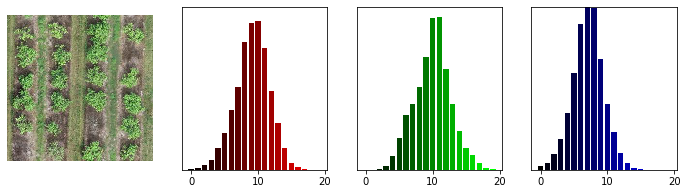

In [18]:
def visualize_rgb_histograms(rgb_image):
    bins = 20

    histograms = []
    for i in range(3):
        histograms.append(histogram_single_channel(rgb_image[:, :, i], bins))

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

    axes[0].imshow(rgb_image)
    axes[0].axis("off")

   
    for i in range(len(histograms)):
        
        colors = np.zeros((bins, 3))
        colors[:, i] = np.linspace(0.0, 1.0, bins)
        axes[i + 1].bar(
            range(bins), histograms[i], color=colors,
        )

       
        axes[i + 1].set_ylim(0, np.max(histograms))
        axes[i + 1].set_yticks([])
    plt.show()
    

visualize_rgb_histograms(load_image(r"C:\Users\Irum\Documents\dataset\images-jpeg\03864.jpeg"))

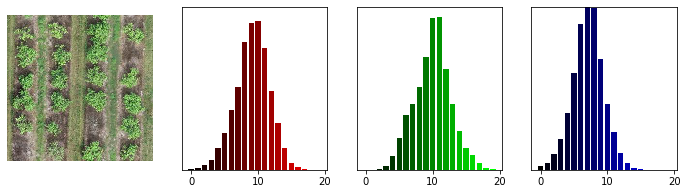

In [17]:

def visualize_hsl_histograms(hsl_image):
    bins = 20

    histograms = []
    for i in range(3):
        histograms.append(histogram_single_channel(rgb_image[:, :, i], bins))

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

    axes[0].imshow(rgb_image)
    axes[0].axis("off")

   
    for i in range(len(histograms)):
        
        colors = np.zeros((bins, 3))
        colors[:, i] = np.linspace(0.0, 1.0, bins)
        axes[i + 1].bar(
            range(bins), histograms[i], color=colors,
        )

       
        axes[i + 1].set_ylim(0, np.max(histograms))
        axes[i + 1].set_yticks([])
    plt.show()
    

visualize_hsl_histograms(load_image(r"C:\Users\Irum\Documents\dataset\images-jpeg\03864.jpeg"))